# Utilizing tf.keras built-in VGG16 with ImageNet

### required modules

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2



### function that prints prediction scores

In [2]:
def print_prediction(label):
    print('{:20}\t{}'.format('prediction', 'score'))
    print('------------------------------')
    for l in label[0]:
        print('{:20}\t{:5.2f}%'.format(l[1], l[2]*100))

### makes a prediction
Resize into VGG16 trained 'images' format

Expand_dims will add an extra dimension to the data at a particular axis
We want the input matrix to the network to be of the form (batchsize, height, width, channels).

Thus we add the extra dimension to the axis 0.

In [3]:
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    print('image size', x.shape)
    plt.imshow(np.uint8(x[0]))
    plt.show()

    x = preprocess_input(x)
    return x


In [4]:
def prepare_image_cv2(img_path):
    img = cv2.resize(cv2.imread(img_path), (224, 224))
    x = np.expand_dims(img, axis=0)
    print('image size', x.shape)
    plt.imshow(x[0])
    plt.show()
    return x


### prebuild model with pre-trained weights on ImageNet

In [5]:
model = VGG16(weights='imagenet', include_top=True)
model.compile(optimizer='sgd', loss='categorical_crossentropy')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### predict


image size (1, 224, 224, 3)


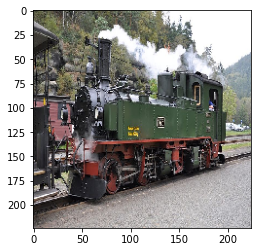

class index  820


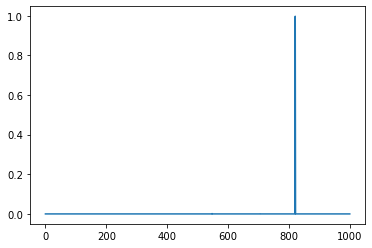

In [6]:
img_path = './data/lokomotive.jpg'
x = prepare_image(img_path)
predictions = model.predict(x)

index = np.argmax(predictions)
print("class index ", index)   
plt.plot(predictions.ravel())
plt.show()


### convert the probabilities to class labels
We will get top 5 predictions which is the default

In [7]:
label = decode_predictions(predictions)
print_prediction(label)

prediction          	score
------------------------------
steam_locomotive    	99.73%
electric_locomotive 	 0.18%
passenger_car       	 0.07%
freight_car         	 0.01%
tank                	 0.00%


### some other predictions

image size (1, 224, 224, 3)


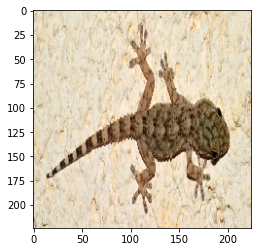

prediction          	score
------------------------------
banded_gecko        	89.10%
alligator_lizard    	 2.09%
African_chameleon   	 1.53%
sidewinder          	 1.16%
agama               	 0.93%


In [8]:
img_path = './data/lizard.jpg'
x = prepare_image(img_path)
predictions = model.predict(x)
label = decode_predictions(predictions)
print_prediction(label)

image size (1, 224, 224, 3)


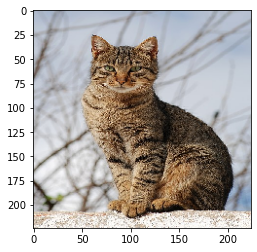

prediction          	score
------------------------------
tiger_cat           	56.11%
tabby               	28.07%
Egyptian_cat        	10.94%
lynx                	 4.17%
leopard             	 0.11%


In [9]:
img_path = './data/cat.jpg'
x = prepare_image(img_path)
predictions = model.predict(x)
label = decode_predictions(predictions)
print_prediction(label)

### extracting features

In [10]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.output_shape)

0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)


### extract features from block4_pool block

image size (1, 224, 224, 3)


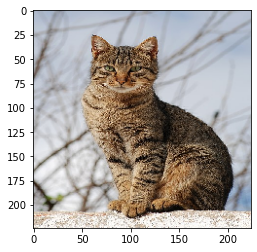

(1, 28, 28, 256)


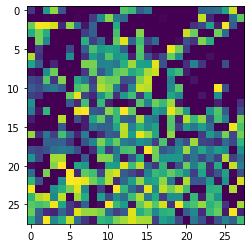

In [27]:
new_model = tf.keras.models.Model(
    inputs = model.input,
    outputs = model.get_layer('block3_pool').output
)

img_path = './data/cat.jpg'
x = prepare_image(img_path)
features = new_model.predict(x)
print(features.shape)

plt.imshow(np.uint8(features[0,:,:,0]))
plt.show()


